<a href="https://colab.research.google.com/github/eovallemagallanes/pattern-recognition/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def transform(X, degree):
    m, n = X.shape  
    X_transform = np.ones((m, 1)) 
    j = 0     
    for j in range(degree + 1) :
        if j != 0 :
            x_pow = np.power(X, j)  
            # append x_pow to X_transform  
            X_transform = np.append(X_transform, x_pow.reshape(-1, 1), axis = 1)
    
    return X_transform  

In [47]:
def gendata(degree):
    B = np.random.randint(low=-10, high=10, size=(degree+1, 1))
    X = np.arange(-2, 2, 0.2)
    X = np.expand_dims(X, axis=-1)
    Y = transform(X, degree)@B 
    noise = np.random.normal(0,1,len(Y))# 5*np.random.rand(*Y.shape)
    noise = np.expand_dims(noise, axis=-1)
    Y = Y + noise

    return X, Y, B


In [3]:
def fitting(X, Y, degree, regularization=False, l=0.01):
    X_transform = transform(X, degree)
    print('Regularization: ', regularization)
    if regularization:
        B = np.linalg.inv(X_transform.T@X_transform + l*np.eye(degree+1))@(X_transform.T@Y)
    else:
        B = np.linalg.inv(X_transform.T@X_transform)@(X_transform.T@Y)

    return B

In [4]:
def mse(X, Y, B):
    degree = len(B) - 1
    X_transform = transform(X, degree)
    Y_hat = X_transform@B
    err = np.linalg.norm(Y-Y_hat)
    return err

In [5]:
def printpoly(B):
    print('f(x) = %f +' %(B[0]), end='')
    for i, b in enumerate(B[1:-1]):
        print('%fx^%d +' %(b, i+1), end='')
    print('%fx^%d' %(B[-1], len(B)-1)) 

In [6]:
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import FloatSlider, Checkbox, IntSlider, ToggleButton

In [51]:
def runner(X, Y, degree_fit, reg, l):
    # apply polynomial fitting
    B = fitting(X, Y, degree_fit, reg, l)
    print('B:\n', B)
    err = mse(X, Y, B)
    print('MSE: ', err)

    # plot data & fitting
    x_eval = np.arange(-2, 2, 0.01)
    x_eval = np.expand_dims(x_eval, axis=-1)
    Y_hat = transform(x_eval, degree_fit)@B

    plt.plot(X, Y, '*', label='Data')
    plt.plot( x_eval, Y_hat, label='Estimated')
    plt.legend()
    plt.show()

    printpoly(B)
    return B

(20, 1)
(20, 1)
f(x) = -6.000000 +-3.000000x^1 +1.000000x^2


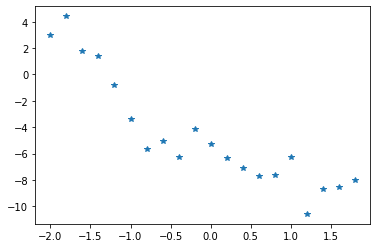

In [49]:
degree_real = 2
X, Y, B_real = gendata(degree_real)
printpoly(B_real)
plt.plot(X, Y, '*')
plt.show()

In [52]:
regularization_widget = Checkbox(value=False, description='Regularization', disabled=False, indent=False)
degree_fit_widget = IntSlider(min=1, max=5, step=1, value=1, continuous_update=False)
lambda_widget = FloatSlider(min=0.01, max=1, step=0.01, value=0.01, continuous_update=False)

w2 = interactive(runner, X=fixed(X), Y=fixed(Y), degree_fit=degree_fit_widget, reg=regularization_widget, l=lambda_widget);
display(w2)

interactive(children=(IntSlider(value=1, continuous_update=False, description='degree_fit', max=5, min=1), Che…